In [2]:
import pandas as pd 
pd.set_option('max_columns', None)   # butun column-lari gormek ucun 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import missingno as msn
import warnings 
warnings.filterwarnings('ignore')

In [54]:
data = pd.read_csv( r'C:\Users\mustafayevavb\Desktop\Data Coders\Lesson Codes\globalterrorismdb_0718dist.csv', encoding='latin-1',na_values = ['?',' ?','? '])
# encoding='utf-8'
# na_values = ['?',' ?','? ']  neyi null deyer kimi qebul edirikse onu yaziriq

In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [6]:
data.shape

(181691, 135)

<AxesSubplot:>

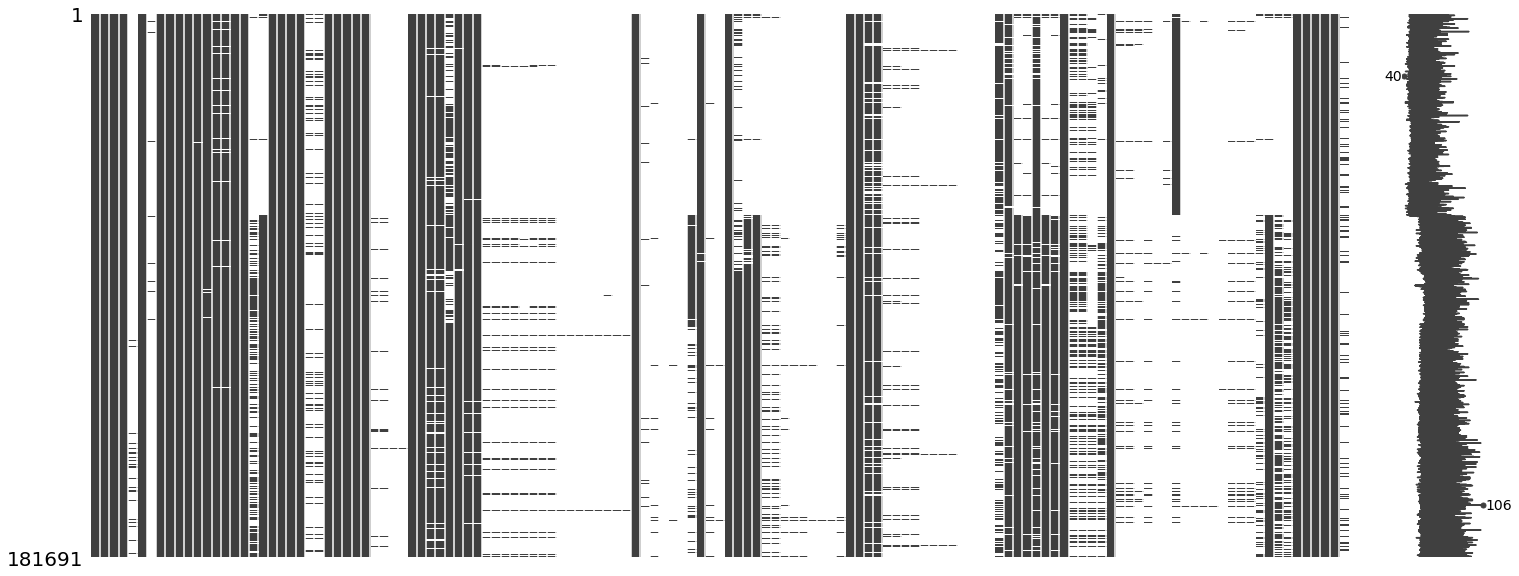

In [7]:
# Null deyerlerin qrafiki
msn.matrix(data)

<AxesSubplot:>

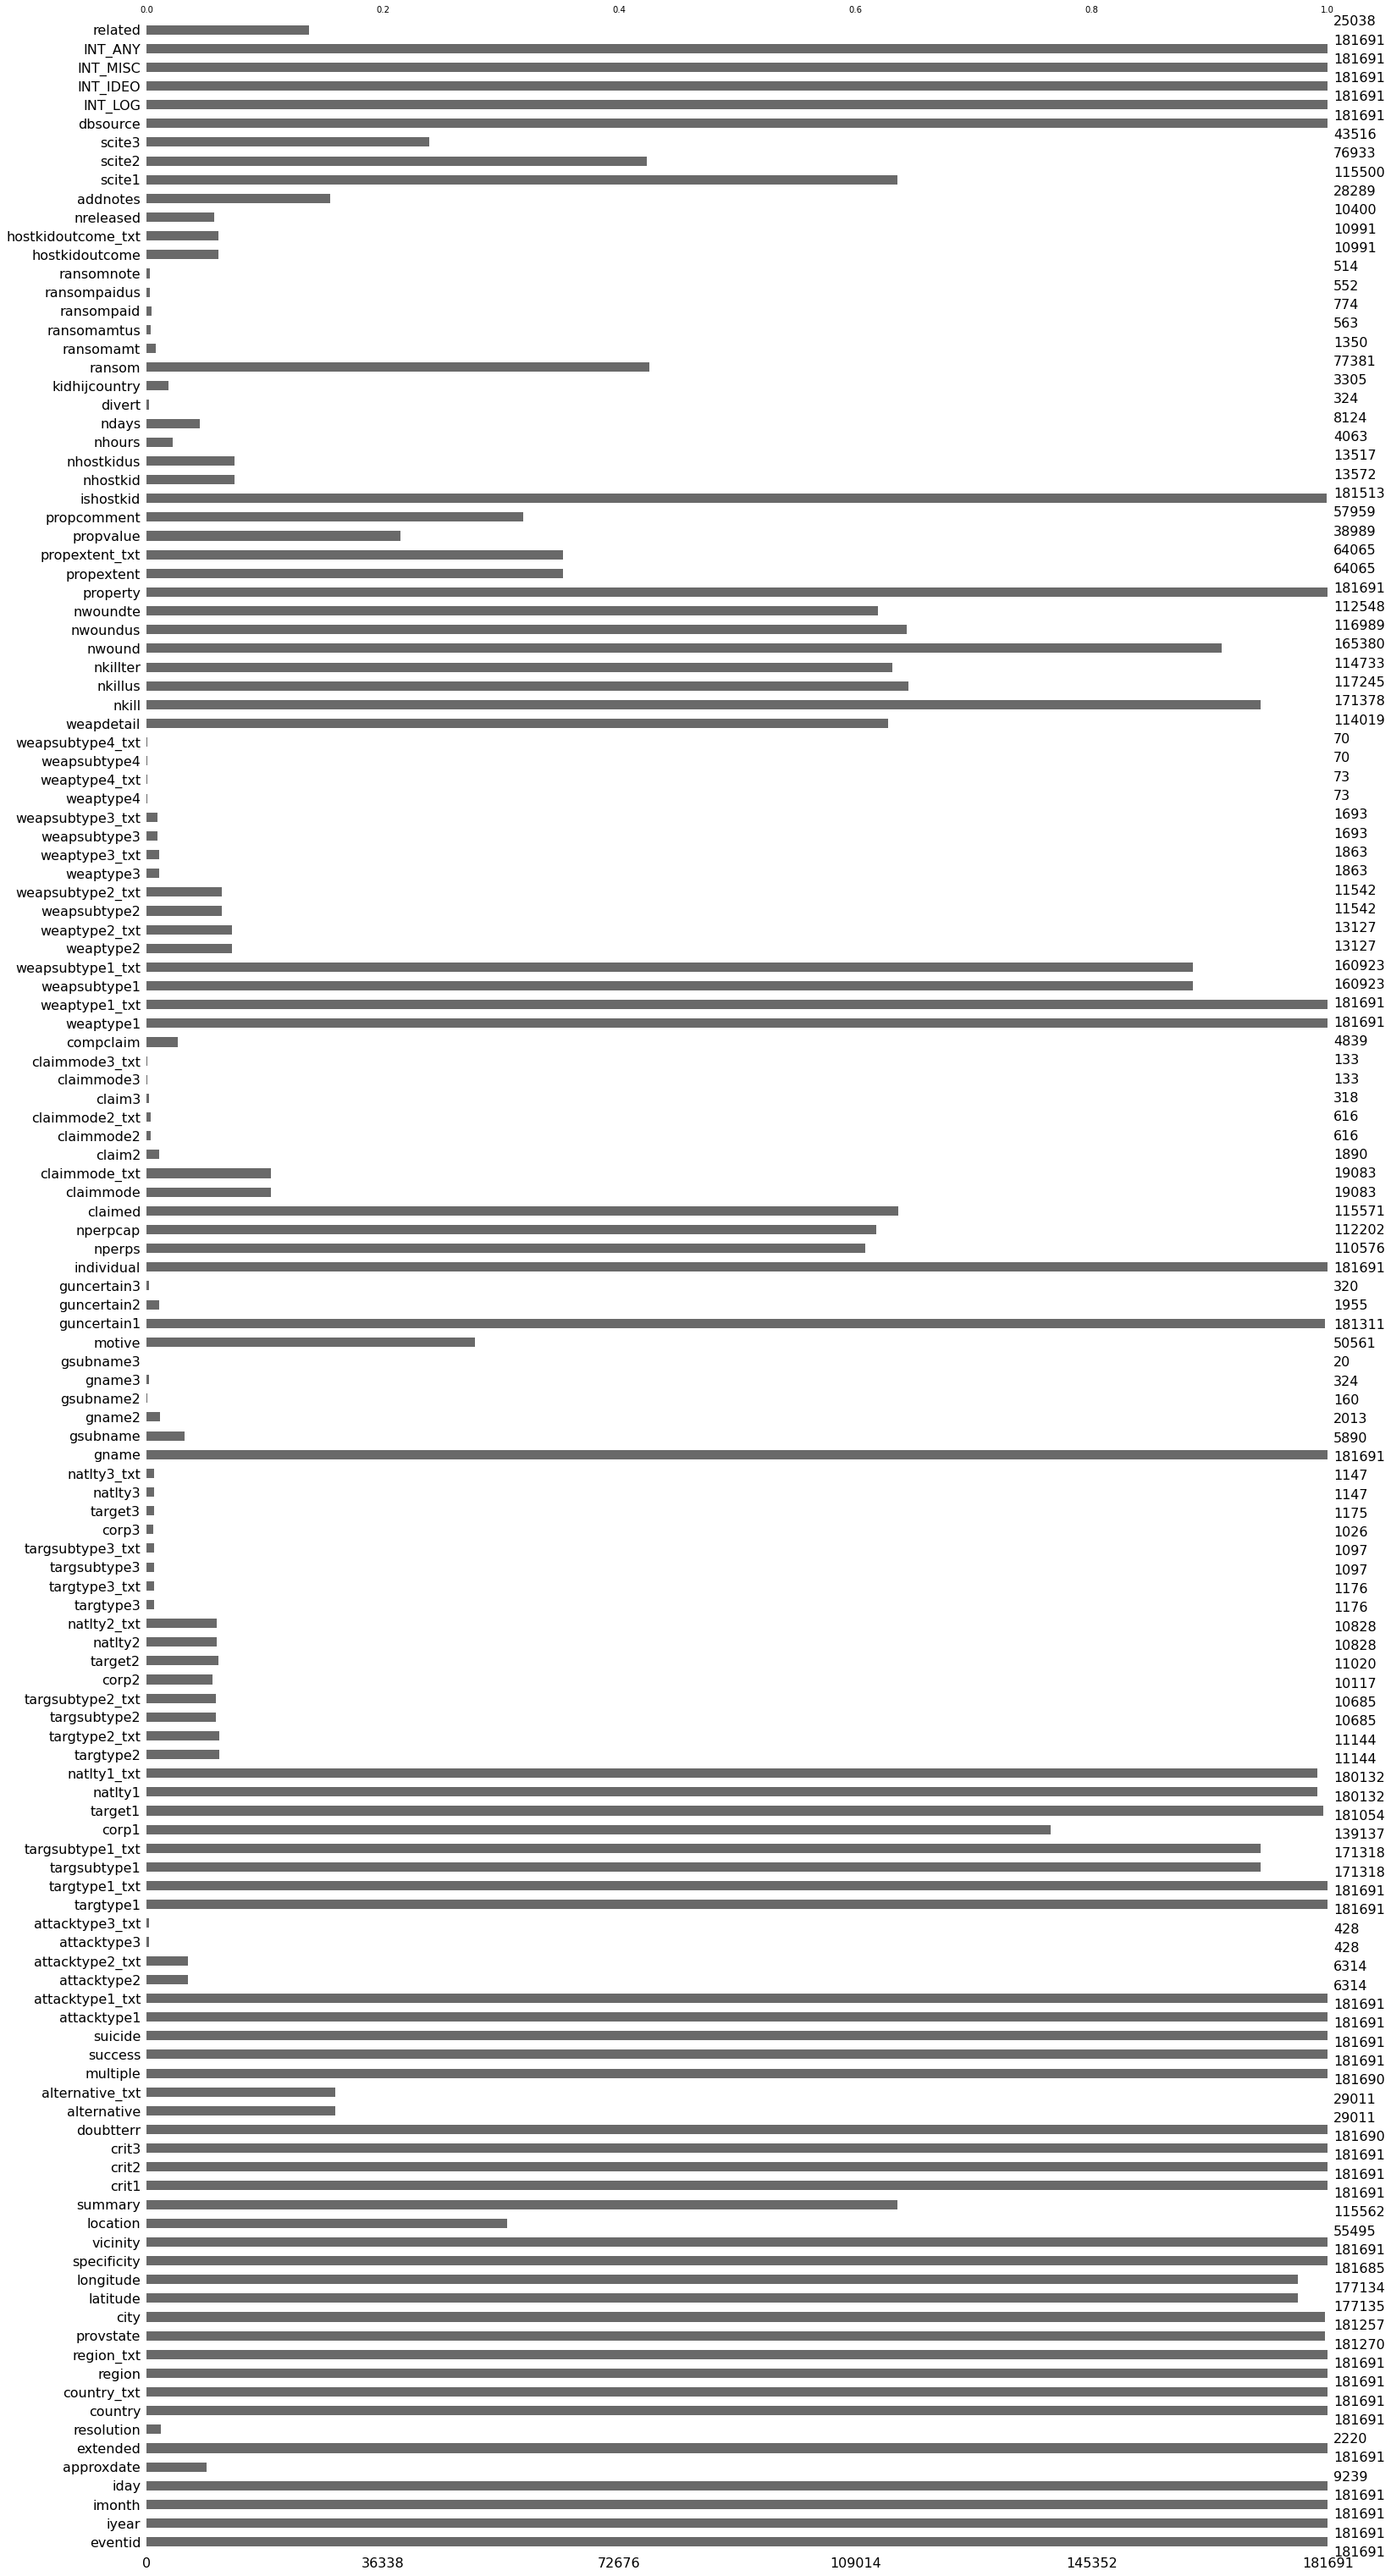

In [8]:
msn.bar(data)

# Data Visualization

<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

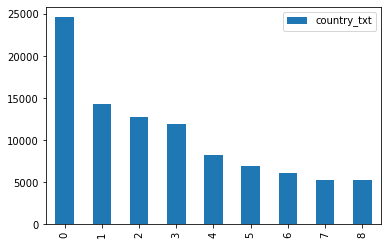

In [13]:
# Hansi olkelerde nece terror hadisesi olub
plt.figure(figsize = (12,8))
result = data['country_txt'].value_counts().reset_index()  # index-i yeniden siralayir
result[result['country_txt']>5000].plot.bar()


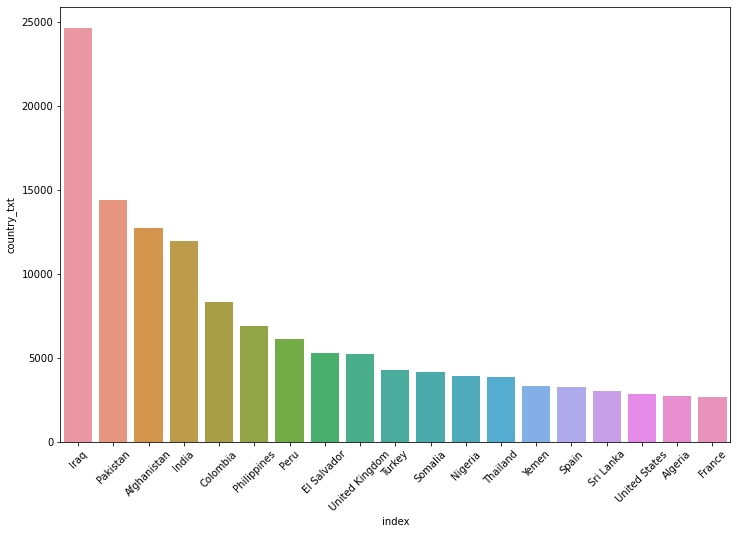

In [17]:
plt.figure(figsize = (12,8))
result = data['country_txt'].value_counts().reset_index()  # index-i yeniden siralayir ve yeni df yaranir
new_result = result[result['country_txt']>2500]

sns.barplot(data = new_result, y ='country_txt' , x = 'index' ) # index sutun 
plt.xticks(rotation =45)
plt.show()  # sozleri silir


<AxesSubplot:>

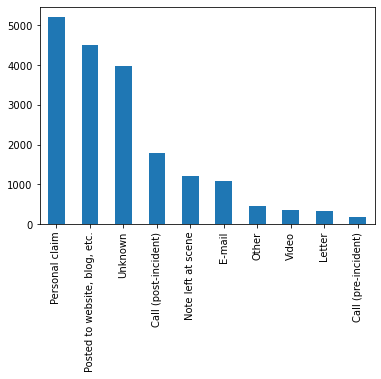

In [19]:
data['claimmode_txt'].value_counts().plot.bar()

<AxesSubplot:>

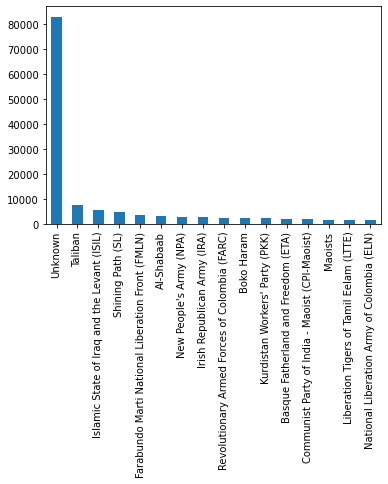

In [23]:
# Her terror qrupu nece terror edib 
group_res = data['gname'].value_counts()
group_res[group_res>1500].plot.bar()

<AxesSubplot:ylabel='country_txt'>

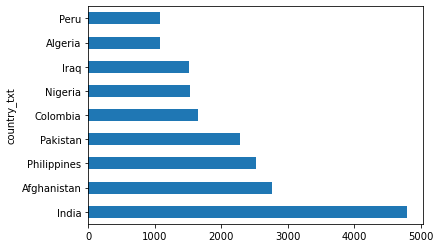

In [36]:
# Her olkenin nece ferqli seherinde terror akti bas verib 
# data.groupby('country_txt')['city'].nunique().sort_values(ascending=False) 

country_terror = data.groupby('country_txt')['city'].nunique().sort_values(ascending=False) 
country_terror[country_terror>1000].plot.barh()

In [31]:
# Her olkenin hansi seherlerinde terror olub 

countries = data['country_txt'].head(100).unique()

for country in countries:
    print(country)
    print(data[data['country_txt'] == country]['city'].unique())
    

Dominican Republic
['Santo Domingo' 'Santiago de los Caballeros' 'San Pedro de Macoris'
 'Moca' 'Bonao' 'Barahona' 'Salcedo' 'Esperanza' 'San Cristobal' 'Haina'
 'Los Alcarrizos' 'Hostos' 'La Vega' 'Villa Jaragua' 'Jarabacoa' 'Nagua'
 'San Francisco de Macoris' 'San Juan de la Maguana' 'Bisono']
Mexico
['Mexico city' 'Monterrey' 'Guadalajara' 'Mexico City' 'Oaxaca' 'Acapulco'
 'Hermosillo' 'Merida' 'Cuernavaca' 'Ecatepec' 'Culiacan' 'Unknown'
 'Ciudad Juarez' 'San Luis Potosi' 'Ciudad Mante' 'Iguala' 'Misantla'
 'Naucalpan' 'Taxquena' 'Tlalpan' 'Ciudad Satelite' 'Xalostoc'
 'Loma Bonita' 'Veracruz' 'Puebla' 'San Lorenzo Tezonco' 'Mapastepec'
 'Uruapan' 'Trinitaria' 'San Jose Miahuatlan' 'Netzahualcoyotl' 'Morelia'
 'Macuspana' 'Irimbo' 'Los Mochis' 'San Pablo' 'Rancho El Mirador'
 'Tiquicheo' 'Matamoros' 'Nuevo Laredo' 'Abasolo' 'Chalam del Carmen'
 'Las Magaritas' 'Ciudad Altamirano' 'Ocosingo'
 'San Cristobal de Las Casas' 'Rancho Nuevo' 'Tehuacan' 'Cuautitlan'
 'Queretaro' 'Tijuana'

<AxesSubplot:>

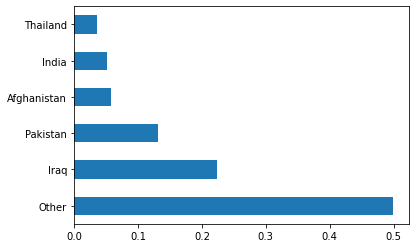

In [40]:
# Qrupun bilinmiyen terror hucumlarindan her olkeye dushen faiz ne qederdir 

only_unkonw = data[ data['gname'] == 'Unknown']
only_unkonw['country_txt'].value_counts(normalize=True) # faiz cevirir

def other_country(row):
    if row not in ['Iraq','Pakistan' , 'Afghanistan' ,'India','Thailand']:
        return 'Other'
    return row

only_unkonw['country_txt']= only_unkonw['country_txt'].map(other_country)

only_unkonw['country_txt'].value_counts(normalize=True).plot.barh()

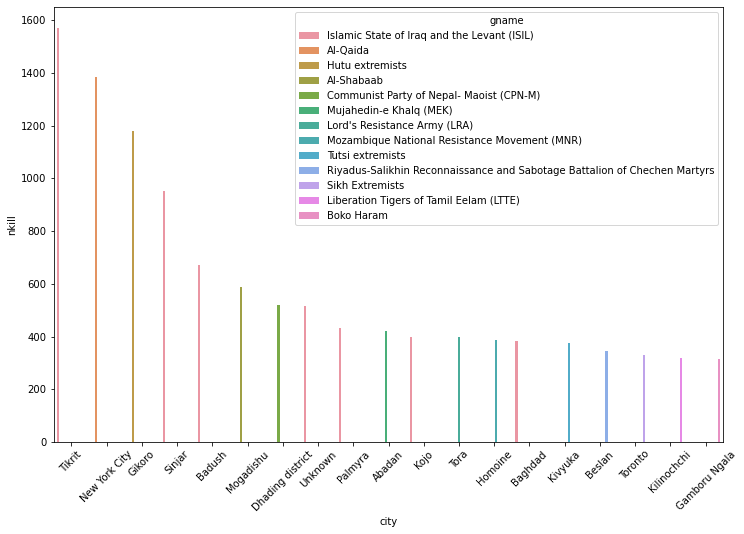

In [47]:
# Hansi seherde olan terror-da olen insan sayi daha coxdur 
most_killed_country = data.sort_values('nkill',ascending=False).head(20)

plt.figure(figsize=(12,8))
sns.barplot(data =most_killed_country, x= 'city', y='nkill')  # hue='gname'
plt.xticks(rotation =45)
plt.show()


<AxesSubplot:>

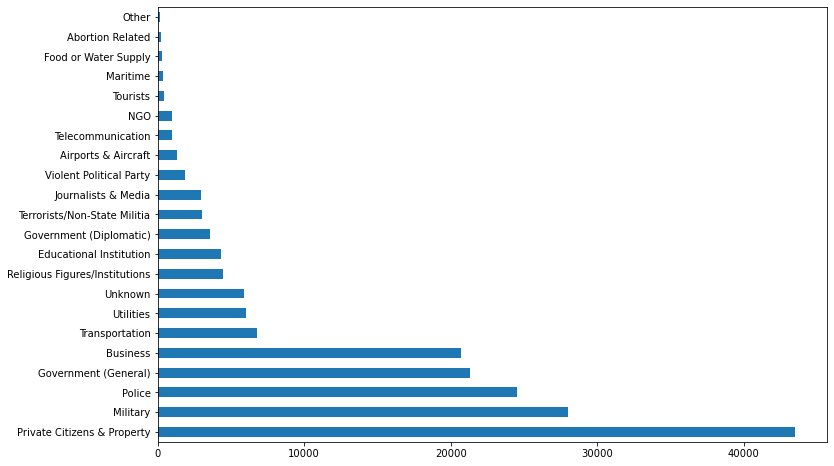

In [56]:
plt.figure(figsize = (12,8))
data['targtype1_txt'].value_counts().plot.barh()

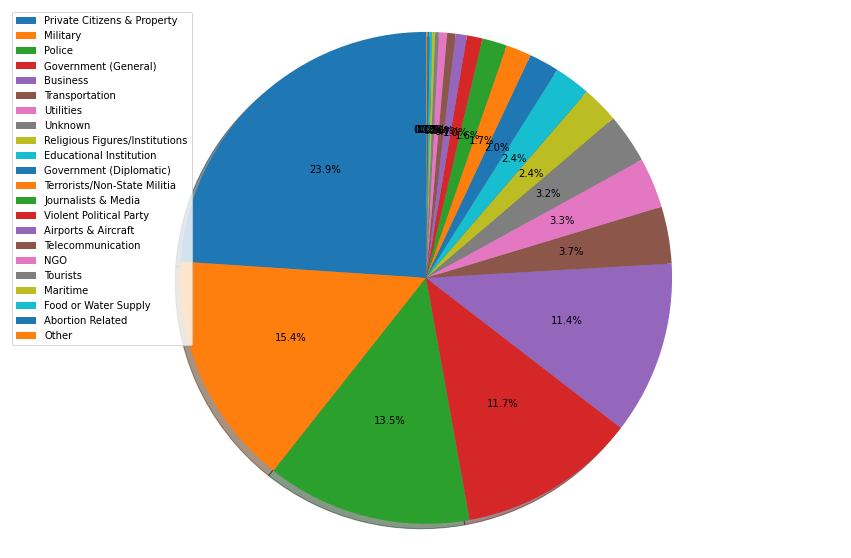

In [59]:
fig, ax = plt.subplots()
fig.set_figheight(10)         # hundurluk
fig.set_figwidth(15)          # en

ax.pie(data['targtype1_txt'].value_counts().values, autopct = '%1.1f%%',shadow = True, startangle = 90)

ax.axis('equal')
plt.legend(data['targtype1_txt'].value_counts().index)
plt.show()